In [2]:
import numpy as np
import matplotlib.pyplot as plt
import gtsam

from robot_utils.robot_data.img_data import ImgData
from robot_utils.robot_data.pose_data import PoseData
from robot_utils.transform import transform

import sys
sys.path.append("/home/masonbp/ford/fastsam3d")

from segment_track.observation import Observation
from segment_track.segment import Segment
from segment_track.tracker import Tracker, Cylinder
from segment_track.fastsam_wrapper import FastSAMWrapper


In [3]:
bag = "/home/masonbp/data/motlee_jan_2024/00/RR08.bag"
img_data = ImgData(
    data_file=bag,
    file_type='bag',
    topic="/RR08/l515/color/image_raw/compressed",
    time_tol=.0333333,
)
depth_data = ImgData(
    data_file=bag,
    file_type='bag',
    topic="/RR08/l515/aligned_depth_to_color/image_raw/compressedDepth",
    time_tol=.0333333,
    compressed_rvl=True,
)
depth_data.extract_params("/RR08/l515/color/camera_info")
t0 = np.max([img_data.t0, depth_data.t0])
img_data.set_t0(img_data.t0 - t0)
depth_data.set_t0(depth_data.t0 - t0)

<Axes: >

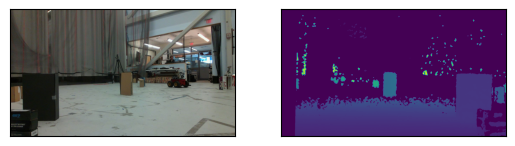

In [6]:
fix, ax = plt.subplots(1, 2)
img_data.show(0.0, ax=ax[0])
depth_data.show(0.0, ax=ax[1])